Here are some of the tests done doing course of this project

To move the wav files into audio folder 

In [1]:
import pandas as pd

In [3]:
import os 

path = 'data/openslr'
files_dict = {}
for folder in os.listdir(path):
    for file_name in os.listdir(path + '/' + folder):
        if file_name.endswith('.flac'):
            filepath = path + '/' + folder + '/' + file_name
            filename, extension = os.path.splitext(file_name)
            files_dict[filename] = filepath 

print(len(files_dict.keys()))


150540


In [4]:
files_df = pd.DataFrame(files_dict.items(),columns=["filename","filepath"])
files_df.head()

,filename,filepath
0,0000c0f43b,data/openslr/00/0000c0f43b.flac
1,00014b6780,data/openslr/00/00014b6780.flac
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac
3,0001cf394a,data/openslr/00/0001cf394a.flac
4,00024e9ee7,data/openslr/00/00024e9ee7.flac


In [7]:
df1 = pd.read_csv('D:\Programming\Projects\major_project\Codes\ASR\data\\transcript\openslr_text.csv')
df1.shape

(157905, 3)

In [8]:
df3 = pd.merge(files_df,df1,left_on='filename',right_on='loc')
df3.shape

(149988, 5)

In [18]:
df3.head(10)

,filename,filepath,loc,id,labels
0,0000c0f43b,data/openslr/00/0000c0f43b.flac,0000c0f43b,5bc3b,अवस्थालाई ज्योतिषमा
1,00014b6780,data/openslr/00/00014b6780.flac,00014b6780,c7f92,पूर्वक पूजा आराधना
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac,0001b0e4b4,693c5,बनेको कुचो
3,0001cf394a,data/openslr/00/0001cf394a.flac,0001cf394a,b66ee,प्रकाश पार्न उपमा
4,00024e9ee7,data/openslr/00/00024e9ee7.flac,00024e9ee7,79c24,दुष्यन्तका नजिक पुग्दछन्
5,0002f96e3e,data/openslr/00/0002f96e3e.flac,0002f96e3e,12e6a,अध्यक्ष पनि हुनुहुन्छ
6,00033e7a6c,data/openslr/00/00033e7a6c.flac,00033e7a6c,1cec5,धेरै धन्यवाद
7,0003991b47,data/openslr/00/0003991b47.flac,0003991b47,24945,अर्को भाषामा लेखिएको छ
8,000414cbb9,data/openslr/00/000414cbb9.flac,000414cbb9,1a81b,थप आकर्षण हुन्
9,00045ee2e0,data/openslr/00/00045ee2e0.flac,00045ee2e0,57449,सबै सरकारी कार्यालयले


In [31]:
req_df = df3[["filename","filepath","id","labels"]]
req_df.rename(columns = {'labels':'text'}, inplace = True)
req_df.head()
# req_df.shape

C:\Users\dell\AppData\Local\Temp/ipykernel_7220/4160962993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_df.rename(columns = {'labels':'text'}, inplace = True)


,filename,filepath,id,text
0,0000c0f43b,data/openslr/00/0000c0f43b.flac,5bc3b,अवस्थालाई ज्योतिषमा
1,00014b6780,data/openslr/00/00014b6780.flac,c7f92,पूर्वक पूजा आराधना
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac,693c5,बनेको कुचो
3,0001cf394a,data/openslr/00/0001cf394a.flac,b66ee,प्रकाश पार्न उपमा
4,00024e9ee7,data/openslr/00/00024e9ee7.flac,79c24,दुष्यन्तका नजिक पुग्दछन्


In [25]:
req_df.to_csv("./data/transcript/dataset_v1.csv")

Moving files to audio directory of the files whose labels are present

In [33]:
import shutil

In [35]:
filepaths = req_df['filepath'].to_list()
dest_path = 'D:\Programming\Projects\major_project\Codes\ASR\data\\audio'
print('Started Moving files')
for src_path in filepaths:
    shutil.move(src_path,dest_path)
print('Completed Moving')

Started Moving files
Completed Moving


In [36]:
len(os.listdir('data/audio'))

149988

In [15]:
df_git = pd.read_csv('D:\Programming\Projects\major_project\Codes\ASR\data\\transcript\github_transcript.csv')
df_git.head()
print(df_git.shape)

(148188, 3)


In [16]:
df4 = pd.merge(files_df,df_git,left_on='filename',right_on='file')
df4.shape
df4.head()

,filename,filepath,file,speaker,text
0,0000c0f43b,data/openslr/00/0000c0f43b.flac,0000c0f43b,5bc3b,अवस्थालाई ज्योतिषमा
1,00014b6780,data/openslr/00/00014b6780.flac,00014b6780,c7f92,पूर्वक पूजा आराधना
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac,0001b0e4b4,693c5,बनेको कुचो
3,0001cf394a,data/openslr/00/0001cf394a.flac,0001cf394a,b66ee,प्रकाश पार्न उपमा
4,00024e9ee7,data/openslr/00/00024e9ee7.flac,00024e9ee7,79c24,दुष्यन्तका नजिक पुग्दछन्


To delete the empty directories in dataset

In [41]:
path = 'data/openslr'
for folder in os.listdir(path):
    print(folder + ':' + str(len(os.listdir(path+'/'+folder))))
    print('Deleting empty folders from list')
    if len(os.listdir(path+'/'+folder)) == 0:
        os.rmdir(path+'/'+folder)

00:13
Deleting empty folders from list
01:28
Deleting empty folders from list
02:12
Deleting empty folders from list
03:15
Deleting empty folders from list
04:17
Deleting empty folders from list
05:16
Deleting empty folders from list
06:16
Deleting empty folders from list
07:18
Deleting empty folders from list
0a:0
Deleting empty folders from list
0b:0
Deleting empty folders from list
0c:0
Deleting empty folders from list
0d:0
Deleting empty folders from list
0e:27
Deleting empty folders from list
0f:0
Deleting empty folders from list
10:4
Deleting empty folders from list
11:3
Deleting empty folders from list
12:3
Deleting empty folders from list
13:7
Deleting empty folders from list
14:3
Deleting empty folders from list
15:8
Deleting empty folders from list
16:5
Deleting empty folders from list
17:4
Deleting empty folders from list
18:8
Deleting empty folders from list
19:6
Deleting empty folders from list
1a:0
Deleting empty folders from list
1b:0
Deleting empty folders from list
1c:

Removing Nepali numbers from the csv

In [1]:
import pandas as pd

In [4]:
dv1 = pd.read_csv('../data/transcript/dataset_v1.csv')
dv1.drop('Unnamed: 0', inplace=True, axis=1)
dv1.head()

,filename,filepath,id,text
0,0000c0f43b,data/openslr/00/0000c0f43b.flac,5bc3b,अवस्थालाई ज्योतिषमा
1,00014b6780,data/openslr/00/00014b6780.flac,c7f92,पूर्वक पूजा आराधना
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac,693c5,बनेको कुचो
3,0001cf394a,data/openslr/00/0001cf394a.flac,b66ee,प्रकाश पार्न उपमा
4,00024e9ee7,data/openslr/00/00024e9ee7.flac,79c24,दुष्यन्तका नजिक पुग्दछन्


In [5]:
dv_temp = dv1[:10000]
dv_temp.shape

(10000, 4)

In [13]:
dv1.shape

(149988, 4)

In [4]:
UNQ_CHARS = [' ', 'ँ', 'ं', 'ः', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ो', 'ौ', '्', 'ॠ', '\u200c', '\u200d', '।']
NUMERIC_CHARS = ["०","१", "२", "३", "४", "५", "६", "७", "८", "९"]


In [15]:
def checkNumeric(test_str):
    ans = True in [c in test_str for c in NUMERIC_CHARS]
    return ans 


In [19]:
dv1['numeric'] = dv1.apply(lambda row: checkNumeric(row.text), axis=1)
dv1.head()

,filename,filepath,id,text,numeric
0,0000c0f43b,data/openslr/00/0000c0f43b.flac,5bc3b,अवस्थालाई ज्योतिषमा,False
1,00014b6780,data/openslr/00/00014b6780.flac,c7f92,पूर्वक पूजा आराधना,False
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac,693c5,बनेको कुचो,False
3,0001cf394a,data/openslr/00/0001cf394a.flac,b66ee,प्रकाश पार्न उपमा,False
4,00024e9ee7,data/openslr/00/00024e9ee7.flac,79c24,दुष्यन्तका नजिक पुग्दछन्,False


In [21]:
dv2 = dv1[dv1['numeric'] == False]
dv2.head()

,filename,filepath,id,text,numeric
0,0000c0f43b,data/openslr/00/0000c0f43b.flac,5bc3b,अवस्थालाई ज्योतिषमा,False
1,00014b6780,data/openslr/00/00014b6780.flac,c7f92,पूर्वक पूजा आराधना,False
2,0001b0e4b4,data/openslr/00/0001b0e4b4.flac,693c5,बनेको कुचो,False
3,0001cf394a,data/openslr/00/0001cf394a.flac,b66ee,प्रकाश पार्न उपमा,False
4,00024e9ee7,data/openslr/00/00024e9ee7.flac,79c24,दुष्यन्तका नजिक पुग्दछन्,False


In [22]:
dv2.shape

(140783, 5)

Creating dataset v2 that will not have numeric labels 

In [23]:
dv2.to_csv('data/transcript/dataset_v2.csv')

Testing audio file

The sampled audio is returned as a numpy array (time series) and has  (48000,)  number of samples
The 10 randomly picked consequitive samples of the audio are:  [ 9.15527344e-05 -1.22070312e-04 -6.71386719e-04  2.44140625e-04
 -3.96728516e-04 -3.96728516e-04  1.22070312e-04 -6.40869141e-04
 -1.83105469e-04  0.00000000e+00]


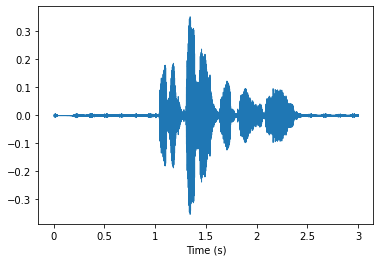

In [2]:
import soundfile as sf 
import librosa, librosa.display

filepath = 'data/audio/0000c0f43b.flac'

y,sr = sf.read(filepath)
librosa.display.waveshow(y, sr= 16000, x_axis='s')
print("The sampled audio is returned as a numpy array (time series) and has ", y.shape, " number of samples")
print("The 10 randomly picked consequitive samples of the audio are: ", y[3000:3010])

In [12]:
import numpy as np 
y
np.average(np.absolute(y))

0.011913913091023763

In [1]:
from model.utils import clean_single_audio_file, plot_wave, load_wav


To reflect changes from changed python file

In [1]:
import importlib
imported_module = importlib.import_module("model.utils")
importlib.reload(imported_module)
from model.utils import *

In [2]:
import pandas as pd 
import numpy as np

In [11]:
def load_data(wavs_dir, csv_path,nrows):
    '''
    wav_dir => contains audio file
    texts_dir => contains the csv file
    '''
    texts_df = pd.read_csv(csv_path)
    train_wavs = []
    for f_name in texts_df[:nrows]["filename"]:
        # wav,sr
        wav, _ = librosa.load(f"{wavs_dir}/{f_name}.flac", sr=SAMPLING_RATE)
        train_wavs.append(wav)
    train_texts = texts_df["text"][:nrows].tolist()
    return train_wavs, train_texts

In [12]:
wavs_dir = './data/audio'
csv_path = './data/transcript/dataset_v4_15k.csv'
train_wavs, train_texts = load_data(wavs_dir,csv_path,10)

In [13]:
print(len(train_wavs))
train_wavs

10


[array([0.00119019, 0.00073242, 0.00119019, ..., 0.00067139, 0.0010376 ,
        0.00106812], dtype=float32),
 array([ 6.1035156e-05,  3.0517578e-05, -1.2207031e-04, ...,
        -5.7983398e-04, -4.5776367e-04, -5.1879883e-04], dtype=float32),
 array([-0.00125122, -0.00076294, -0.00192261, ..., -0.00180054,
        -0.00112915, -0.00109863], dtype=float32),
 array([ 3.9672852e-04,  2.4414062e-04, -3.0517578e-05, ...,
         8.5449219e-04, -3.3569336e-04, -2.1362305e-04], dtype=float32),
 array([0.00061035, 0.00064087, 0.0015564 , ..., 0.00338745, 0.0039978 ,
        0.0045166 ], dtype=float32),
 array([ 0.00015259,  0.00021362,  0.00012207, ..., -0.00064087,
         0.00027466, -0.00042725], dtype=float32),
 array([-0.00054932, -0.00073242, -0.00085449, ...,  0.00030518,
         0.00045776,  0.00039673], dtype=float32),
 array([ 0.00030518,  0.00061035,  0.00054932, ..., -0.0005188 ,
        -0.00094604, -0.00100708], dtype=float32),
 array([-0.00094604,  0.00354004, -0.00039673, .

In [14]:
print(len(train_texts))
train_texts

10


['विकास क्षेत्र लुम्बिनी',
 'मुताविक चित्रहरूको बैध',
 'त्यसैले शाब्दिक रूपमा',
 'दृष्टिकोणले किराँती विशेषता',
 'नेपालको साहित्यिक कार्यक्रमबाट',
 'केन्द्रमा बनाइएको समाधिस्थल',
 'महाराजा भुपिन्दर सिंहले',
 'मन्दिरमा चढाएको सामग्रीहरूबाट',
 'माफाल्दाको विषयवस्तु बालबालिकाहरूमा',
 'लगायतका ग्रन्थहरूमा यसबारेमा']

In [20]:
import numpy as np 
arr1 = np.linspace(2,10,num=18)
arr1.shape

(18,)

In [24]:
arr2 = arr1.reshape(3,-1,2)
print(arr2.shape)
print(arr2)

(3, 3, 2)
[[[ 2.          2.47058824]
  [ 2.94117647  3.41176471]
  [ 3.88235294  4.35294118]]

 [[ 4.82352941  5.29411765]
  [ 5.76470588  6.23529412]
  [ 6.70588235  7.17647059]]

 [[ 7.64705882  8.11764706]
  [ 8.58823529  9.05882353]
  [ 9.52941176 10.        ]]]


It means that there are 3 2 dimensional arrays in the given array and in each 2d array there are 3 1d array and in each 1d array there are 2 elements 

In [16]:
%load_ext autoreload
%autoreload 2

[-0.00314331  0.00357056 -0.00057983 ...  0.00018311 -0.00057983
  0.00030518]


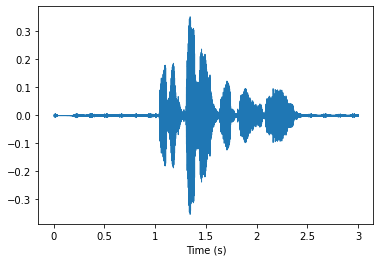

In [15]:
from model.utils import load_wav


filepath = 'data/audio/0000c0f43b.flac'
wav = load_wav(filepath)
print(wav)
plot_wave(wav)

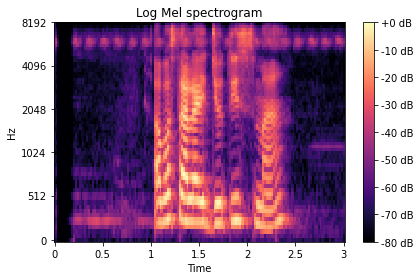

In [19]:
plot_spectrogram(wav)

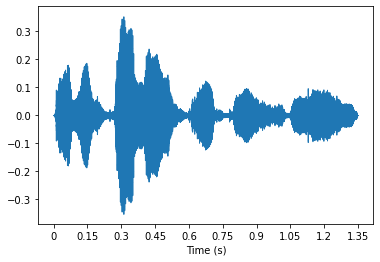

In [21]:
from model.utils import clean_single_audio_file, plot_wave
import librosa

trimmed_audio = clean_single_audio_file(wav)
plot_wave(trimmed_audio)

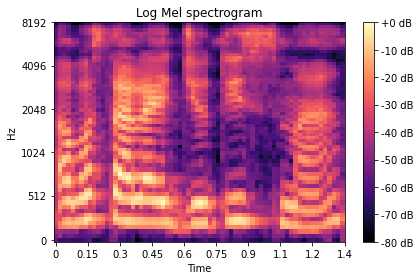

In [22]:
plot_spectrogram(trimmed_audio)

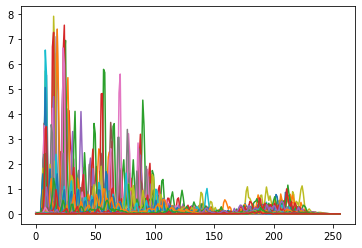

In [19]:
import matplotlib.pyplot as plt 
import numpy as np
n_fft = 512
D = np.abs(librosa.stft(wav, n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

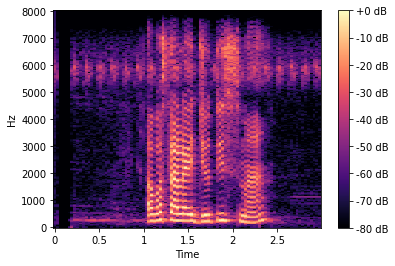

In [25]:
DB = librosa.amplitude_to_db(D,ref=np.max)
librosa.display.specshow(DB,sr=16000,x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB');

In [9]:
l1 = 'D:\Programming\Projects\major_project\Codes\ASR\\ne_np_female\loud_sound.wav'
l2 = 'D:\Programming\Projects\major_project\Codes\ASR\\ne_np_female\loud2.wav'
s1 = 'D:\Programming\Projects\major_project\Codes\ASR\\ne_np_female\\faint.wav'
s2 = 'D:\Programming\Projects\major_project\Codes\ASR\\ne_np_female\soft.wav'
a1 = 'D:\Programming\Projects\major_project\Codes\ASR\\ne_np_female\\both.wav'

In [7]:
def checkAudioFile(filepath):
    wav = load_wav(filepath)
    print(wav)
    plot_wave(wav)
    plot_spectrogram(wav)
    trimmed_audio = clean_single_audio_file(wav)
    plot_wave(trimmed_audio)
    plot_spectrogram(trimmed_audio)

[4.2369415e-04 4.8322714e-04 2.4313900e-04 ... 1.5039110e-04 4.9811257e-05
 0.0000000e+00]


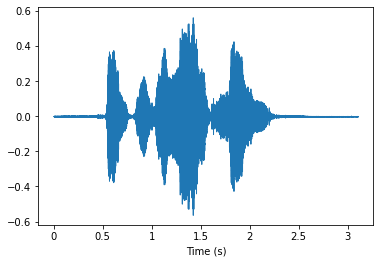

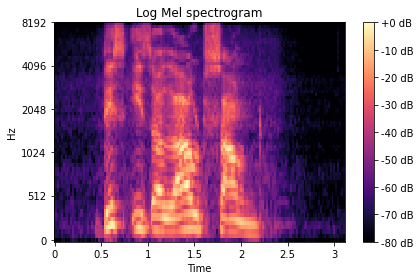

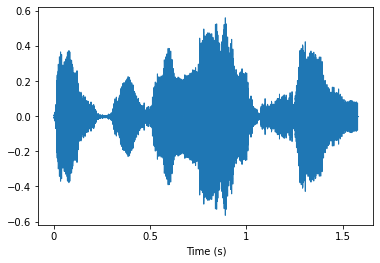

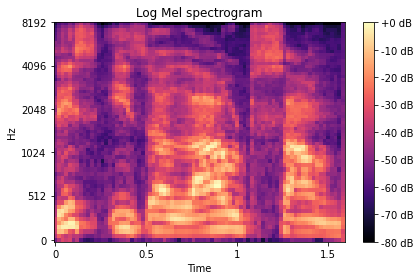

In [10]:
checkAudioFile(l1)

[-6.7620311e-04 -1.0835319e-03 -1.3818684e-04 ...  6.3993321e-05
  1.2662603e-05  0.0000000e+00]


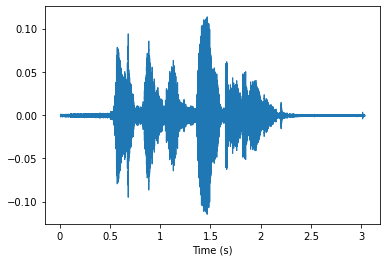

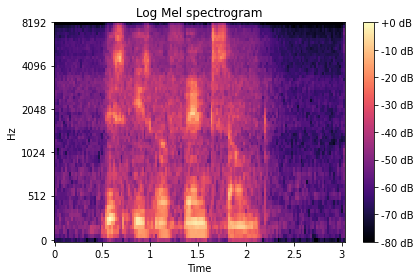

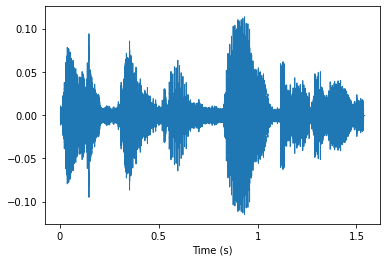

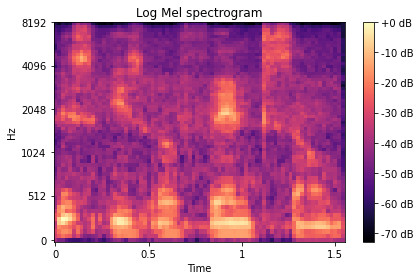

In [11]:
checkAudioFile(s1)

[-5.6449953e-03 -9.0533774e-03 -1.1705098e-03 ...  5.2339601e-04
  8.8348381e-05  0.0000000e+00]


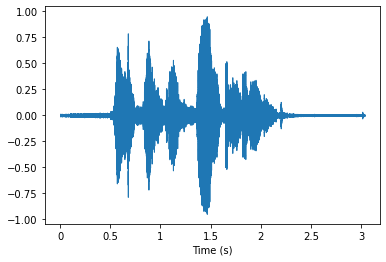

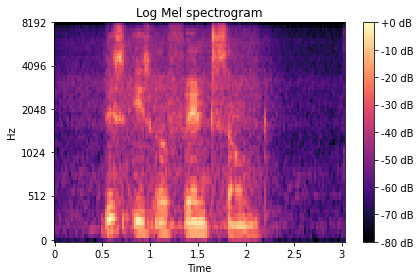

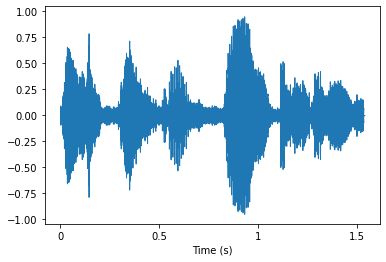

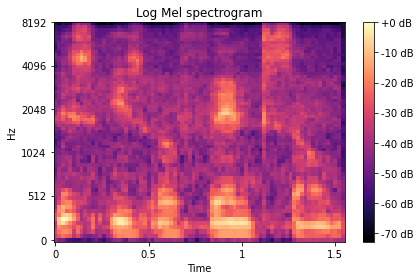

In [13]:
from pydub import AudioSegment , effects 

rawsound = AudioSegment.from_file(s1, "wav")  
normalizedsound = effects.normalize(rawsound)  
normalizedsound.export("./output1.wav", format="wav")
checkAudioFile("./output1.wav")

[7.3216867e-04 8.2631904e-04 4.1537068e-04 ... 2.5313030e-04 7.1035982e-05
 0.0000000e+00]


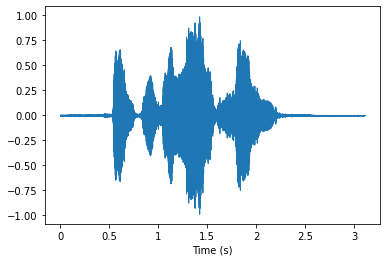

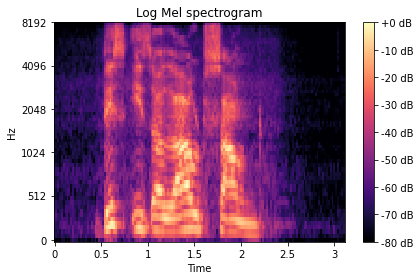

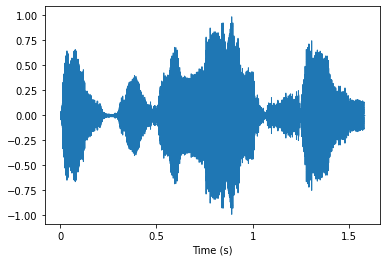

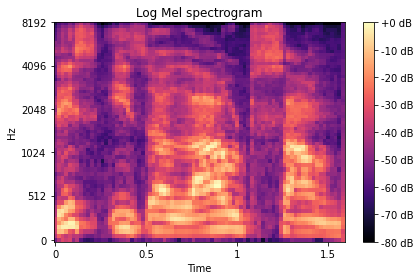

In [14]:
rawsound = AudioSegment.from_file(l1, "wav")  
normalizedsound = effects.normalize(rawsound)  
normalizedsound.export("./output2.wav", format="wav")
checkAudioFile("./output2.wav")

In [1]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to C:\Users\dell/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [2]:
from huggingface_hub import create_repo
create_repo(repo_id="test-model")

'https://huggingface.co/anish-shilpakar/test-model'